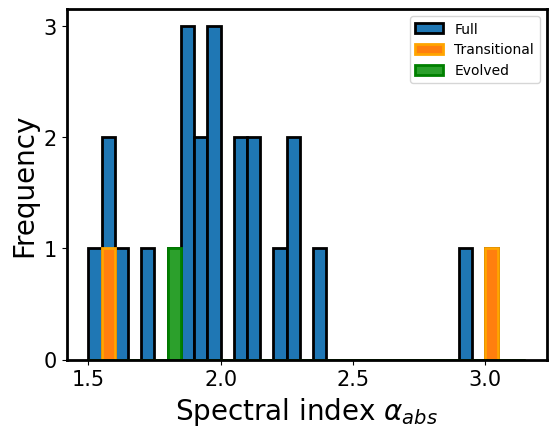

Sources            SpT    log(T_{star}/K)    Distance             log frac{l_{\star}}{L_{\odot}}    Stellar mass (M_{\star})
-----------------  -----  -----------------  -------------------  --------------------------------  --------------------------
J15354856-2958551  M4     3.51\pm0.02        87.84(-1.05,+1.07)   -1.035(0.046,-0.046)              0.27(0.13,-0.1)
J15514032-2146103  M4     3.51\pm0.02        140.84(-0.79,+0.8)   -1.335(0.096,-0.096)              0.27(0.13,-0.1)
J15521088-2125372  M4     3.51\pm0.02        154.94(-5.02,+5.36)  -1.752(0.117,-0.117)              0.27(0.13,-0.1)
J15530132-2114135  M4     3.51\pm0.02        143.04(-1.05,+1.06)  -1.212(0.099,-0.099)              0.27(0.13,-0.1)
J15534211-2049282  M3.5   3.52\pm0.02        145.0(-20.0,+20.0)   -0.84(0.14,-0.14)                 0.33(0.16,-0.12)
J15551704-2322165  M2.5   3.54\pm0.02        145.0(-20.0,+20.0)   -0.54(0.15,-0.15)                 0.49(0.18,-0.16)
J15554883-2512240  G3     3.77\pm0.01        143.5

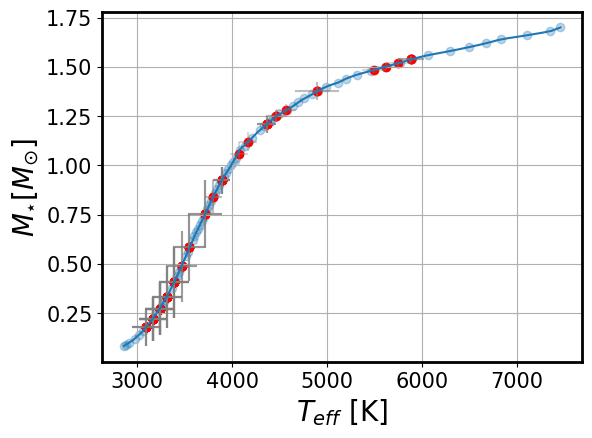

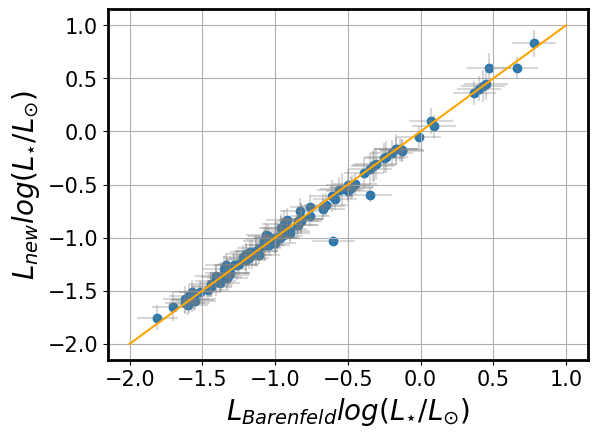

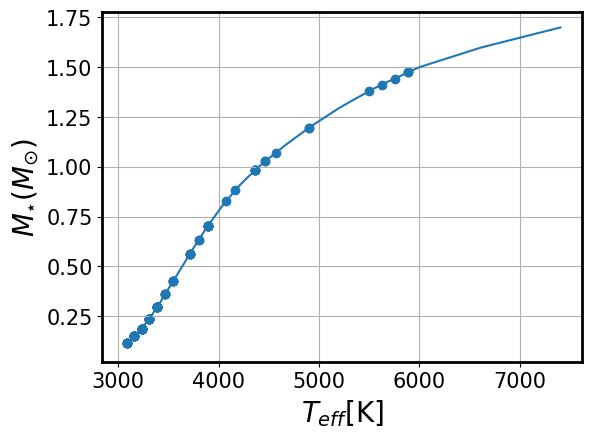

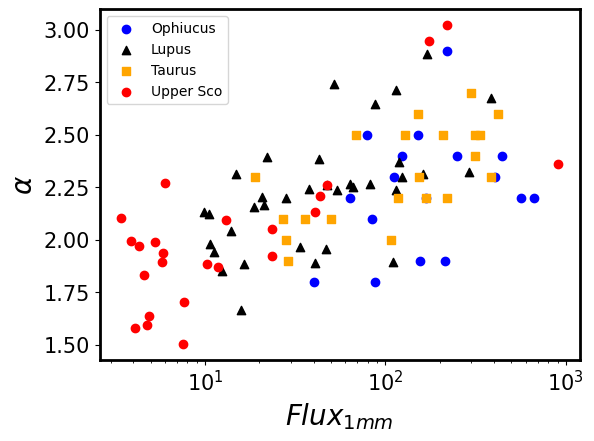

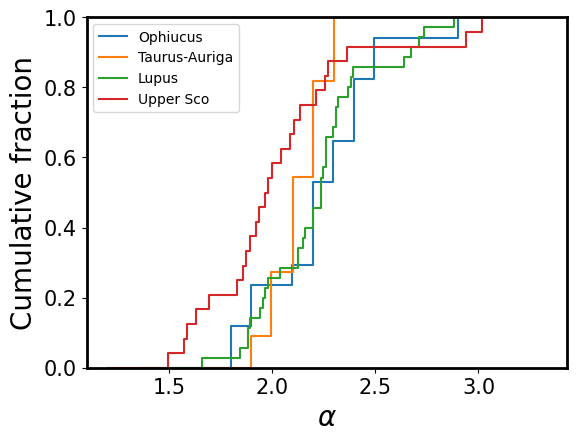

Upper_sco, Ophiucus KstestResult(statistic=0.45588235294117646, pvalue=0.021597017427386647)
Upper_sco, Taurus KstestResult(statistic=0.5357142857142857, pvalue=0.0017269211993544886)
Upper_sco, Lupus KstestResult(statistic=0.4226190476190476, pvalue=0.00819236989204072)
Upper_sco, Together KstestResult(statistic=0.4349315068493151, pvalue=0.0013364799317200726)


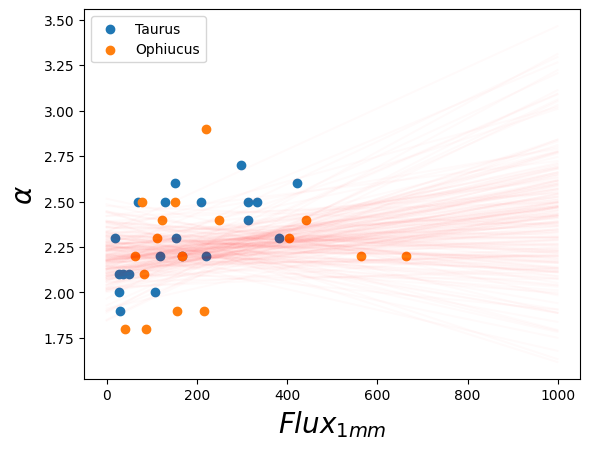

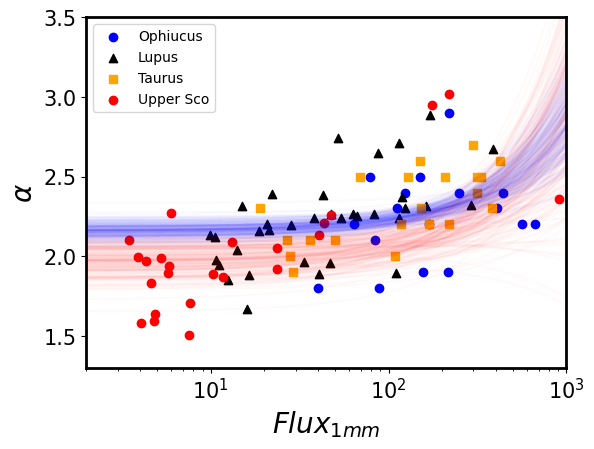

In [1]:
from linmix import linmix
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, ks_2samp
import random

from data_file import flux_list_2_87mm_garrett, ricci_ophiuchi_flux_3_3mm
from Cumulative_spectral_indices import flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, ricci_taurus_fluxes_1mm, spectral_indices_taurus, flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, flux_lupus_1_mm, tazzari_lupus_spectral_indices, matching_fluxes_ricci_ophiucus_3MM_1mm, matching_fluxes_ricci_ophiucus_3mm_1MM, tazzari_lupus_flux

xsig = [0.2] * 99
ysig = [0.2] * 99

log_flux_barenfeld_0_88mm_updated = [np.log10(x) for x in flux_barenfeld_0_88mm_updated]
log_ricci_taurus_fluxes_1mm = [np.log10(x) for x in ricci_taurus_fluxes_1mm]
log_flux_list_ophiucus_ricci_1mm = [np.log10(x) for x in flux_list_ophiucus_ricci_1mm]
log_flux_lupus_1_mm = [np.log10(x) for x in flux_lupus_1_mm]

In [76]:
class region_data():
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

lupus_data = region_data()
taurus_data = region_data()
ophiucus_data = region_data()
upper_sco_data = region_data()
total_sample_data = region_data()

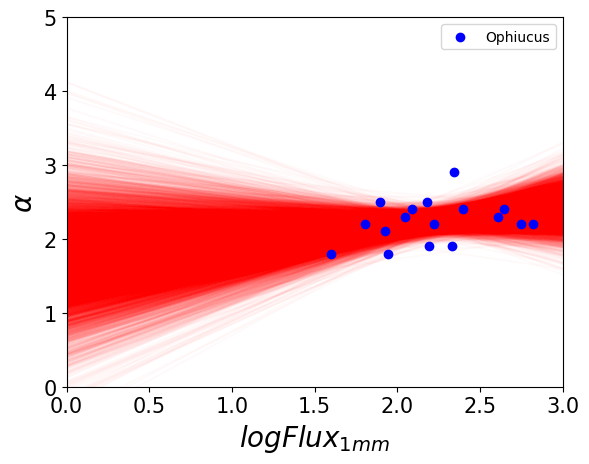

In [104]:
fig, ax = plt.subplots()

lm = linmix.LinMix(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, xsig[:len(flux_list_ophiucus_ricci_1mm)], ysig[:len(flux_list_ophiucus_ricci_1mm)], K=2)
lm.run_mcmc(silent=True)

ophiucus_slope_flux_alpha = []
ophiucus_y_intercept_flux_alpha = []
ophiucus_scatter = []

xmin = 0
xmax = 800
xs = np.arange(xmin,xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    ophiucus_slope_flux_alpha.append(lm.chain[i]['beta'])
    ophiucus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    ophiucus_scatter.append(lm.chain[i]['sigsqr'])

plt.scatter(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, label='Ophiucus', color='b', zorder=1)
plt.errorbar(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, yerr=ysig[:len(flux_list_ophiucus_ricci_1mm)], ls='none', zorder=1)


plt.xlabel('$log Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xlim(0,3)
plt.ylim(0,5)
ax.tick_params(which='both', labelsize=15)
plt.show()

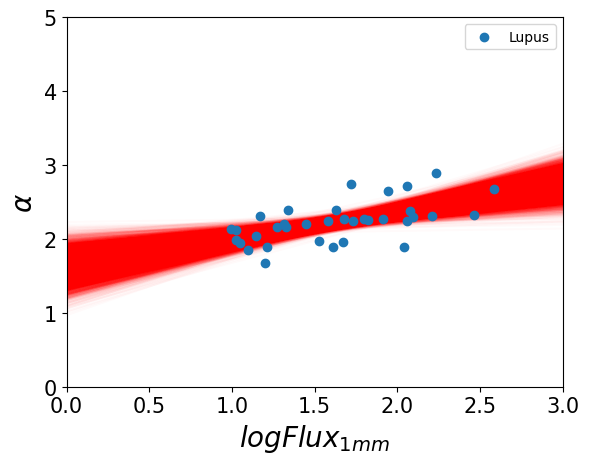

In [105]:
fig, ax = plt.subplots()

flux_lupus_1_mm = [np.log10(x) for x in flux_lupus_1_mm]
lm = linmix.LinMix(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, xsig[:len(flux_lupus_1_mm)], ysig[:len(flux_lupus_1_mm)], K=2)
lm.run_mcmc(silent=True)

lupus_slope_flux_alpha = []
lupus_y_intercept_flux_alpha = []
lupus_scatter = []

xs = np.arange(xmin, xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    lupus_slope_flux_alpha.append(lm.chain[i]['beta'])
    lupus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    lupus_scatter.append(lm.chain[i]['sigsqr'])


plt.scatter(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, label='Lupus', zorder=1)

plt.xlabel('$log Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xlim(0,3)
plt.ylim(0,5)

ax.tick_params(which='both', labelsize=15)
plt.show()

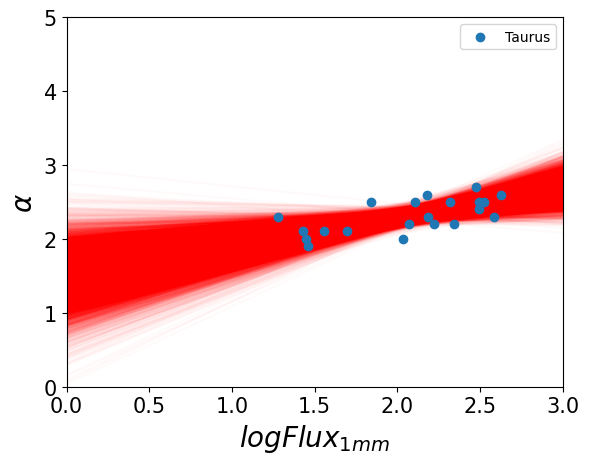

In [79]:
fig, ax = plt.subplots()

lm = linmix.LinMix(log_ricci_taurus_fluxes_1mm, spectral_indices_taurus, xsig[:len(ricci_taurus_fluxes_1mm)], ysig[:len(ricci_taurus_fluxes_1mm)], K=2)
lm.run_mcmc(silent=True)

taurus_slope_flux_alpha = []
taurus_y_intercept_flux_alpha = []
taurus_scatter =[]

xs = np.arange(xmin, xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    taurus_slope_flux_alpha.append(lm.chain[i]['beta'])
    taurus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    taurus_scatter.append(lm.chain[i]['sigsqr'])

plt.scatter(log_ricci_taurus_fluxes_1mm, spectral_indices_taurus, label='Taurus', zorder=1)

plt.xlabel('$log Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xlim(0,3)
plt.ylim(0,5)
ax.tick_params(which='both', labelsize=15)
plt.show()

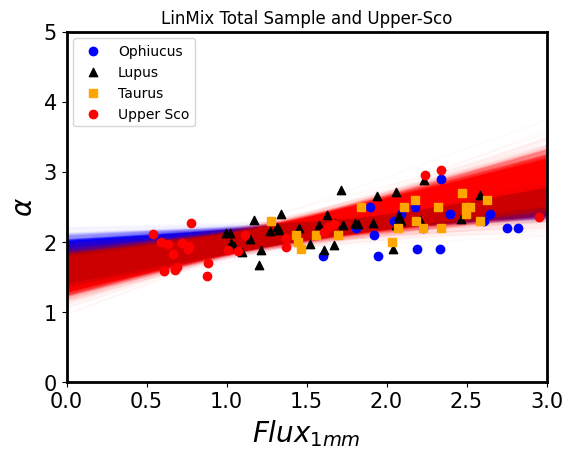

In [80]:
fig, ax = plt.subplots()

# set thickness axis
plt.setp(ax.spines.values(), linewidth=2)

# avoid axis labels being cut
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)

log_total_fluxes = log_ricci_taurus_fluxes_1mm + log_flux_lupus_1_mm + log_flux_list_ophiucus_ricci_1mm
total_spectra_indices = spectral_indices_taurus + tazzari_lupus_spectral_indices + spectral_index_ophiucus

xsig = [0] * 100
ysig = [0] * 100
lm = linmix.LinMix(log_total_fluxes, total_spectra_indices, xsig[:len(log_total_fluxes)], ysig[:len(log_total_fluxes)], K=2)
lm.run_mcmc(silent=True)

total_sample_slope_flux_alpha = []
total_sample_y_intercept_flux_alpha = []
scatter_total_sample = []

xs = np.arange(0, 7)
for i in range(0, 10000):
    total_sample_slope_flux_alpha.append(lm.chain[i]['beta'])
    total_sample_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='b', alpha=0.02, zorder=0)
    scatter_total_sample.append(lm.chain[i]['sigsqr'])


lm = linmix.LinMix(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, xsig[:len(flux_barenfeld_0_88mm_updated)], ysig[:len(flux_barenfeld_0_88mm_updated)], K=2)
lm.run_mcmc(silent=True)

upper_sco_slope_flux_alpha = []
upper_sco_y_intercept_flux_alpha = []
scatter_upper_sco = []

xs = np.arange(0, 7)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    upper_sco_slope_flux_alpha.append(lm.chain[i]['beta'])
    upper_sco_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    scatter_upper_sco.append(lm.chain[i]['sigsqr'])

plt.scatter(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, label='Ophiucus', color='blue', zorder=1)
plt.scatter(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, label='Lupus', marker='^', color='black', zorder=1)
plt.scatter(log_ricci_taurus_fluxes_1mm, spectral_indices_taurus, label='Taurus', marker='s', color='orange', zorder=1)
plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, label='Upper Sco', color='red', zorder=1)

plt.xlabel('$Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.xlim(0,3)
plt.ylim(0,5)
plt.legend()
ax.tick_params(which='both', labelsize=15)
plt.title("LinMix Total Sample and Upper-Sco")
plt.savefig("LinMix Total Sample and Upper-Sco")
plt.show()

# Histograms

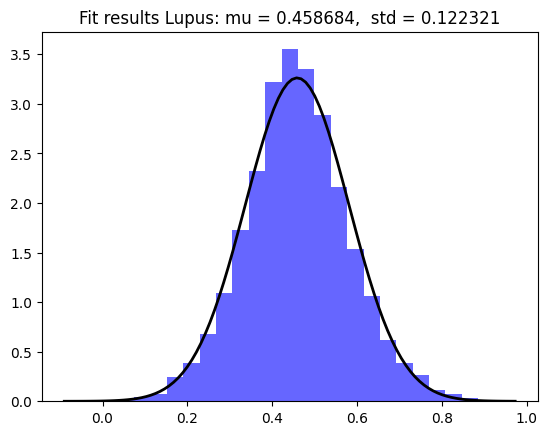

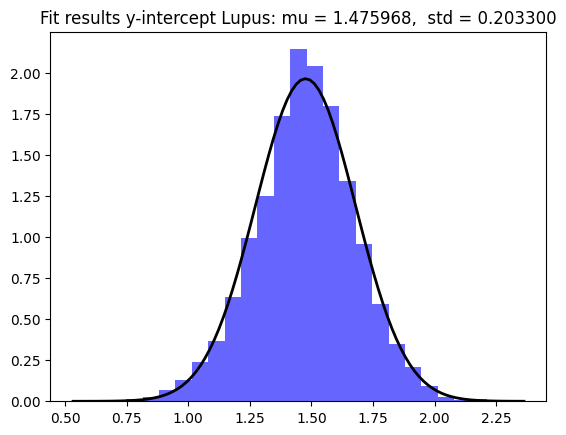

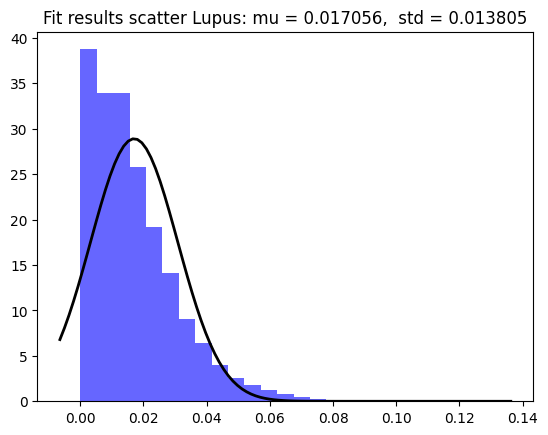

In [81]:
lupus_data.slope_mu, lupus_data.slope_std = norm.fit(lupus_slope_flux_alpha)
# Plot the histogram.
plt.hist(lupus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.slope_mu, lupus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results Lupus: mu = %.6f,  std = %.6f" % (lupus_data.slope_mu, lupus_data.slope_std)
plt.title(title)
plt.show()

lupus_data.y_intercept_mu, lupus_data.y_intercept_std = norm.fit(lupus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(lupus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Lupus: mu = %.6f,  std = %.6f" % (lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.title(title)
plt.show()

lupus_scatter_mu, lupus_scatter_std = norm.fit(lupus_scatter)
# Plot the histogram.
plt.hist(lupus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_scatter_mu, lupus_scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Lupus: mu = %.6f,  std = %.6f" % (lupus_scatter_mu, lupus_scatter_std)
plt.title(title)
plt.show()

### Ophiucus

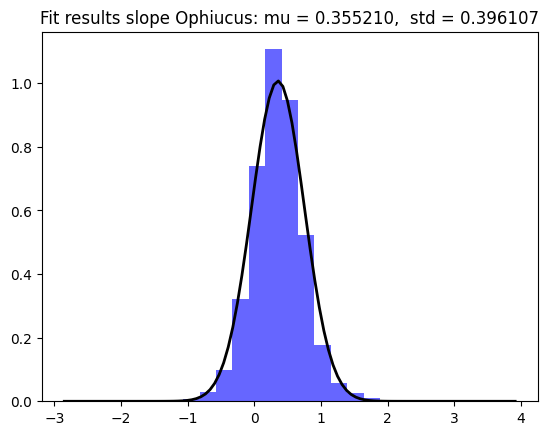

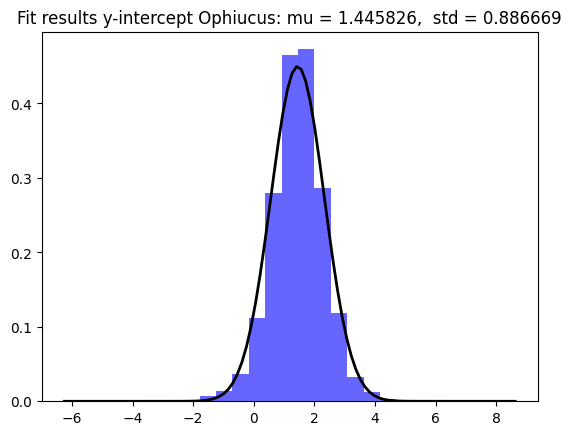

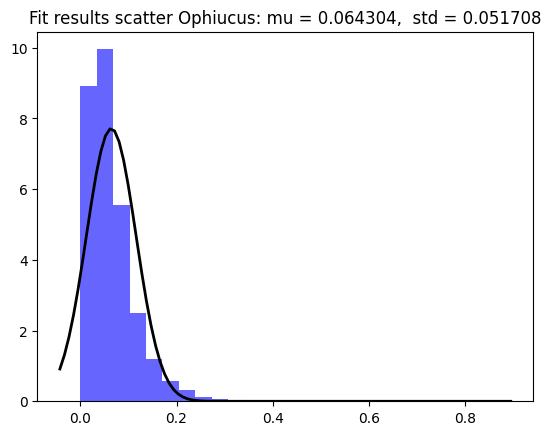

In [82]:
ophiucus_data.slope_mu, ophiucus_data.slope_std = norm.fit(ophiucus_slope_flux_alpha)
# Plot the histogram.
plt.hist(ophiucus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results slope Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.title(title)
plt.show()

ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std = norm.fit(ophiucus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(ophiucus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.title(title)
plt.show()

ophiucus_data.scatter_mu, ophiucus_data.scatter_std = norm.fit(ophiucus_scatter)
_std = norm.fit(ophiucus_scatter)
# Plot the histogram.
plt.hist(ophiucus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.scatter_mu, ophiucus_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.scatter_mu, ophiucus_data.scatter_std)
plt.title(title)
plt.show()

### Taurus

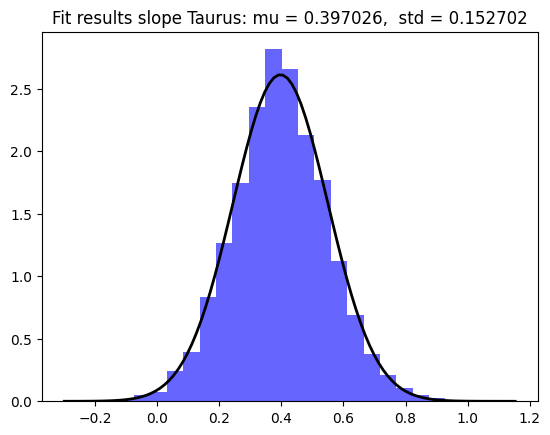

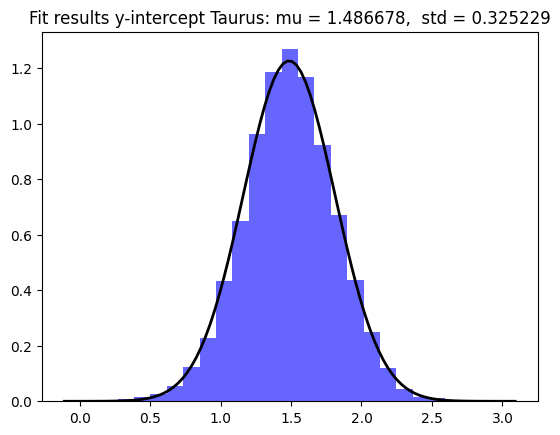

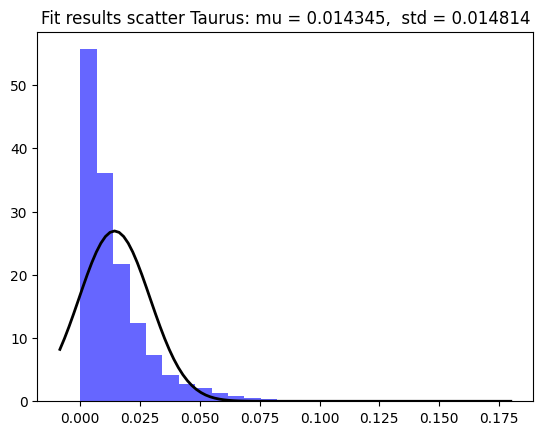

In [83]:
taurus_data.slope_mu, taurus_data.slope_std = norm.fit(taurus_slope_flux_alpha)
# Plot the histogram.
plt.hist(taurus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.slope_mu, taurus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results slope Taurus: mu = %.6f,  std = %.6f" % (taurus_data.slope_mu, taurus_data.slope_std)
plt.title(title)
plt.show()

taurus_data.y_intercept_mu, taurus_data.y_intercept_std = norm.fit(taurus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(taurus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Taurus: mu = %.6f,  std = %.6f" % (taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.title(title)
plt.show()

taurus_data.scatter_mu, taurus_data.scatter_std = norm.fit(taurus_scatter)
# Plot the histogram.
plt.hist(taurus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.scatter_mu, taurus_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Taurus: mu = %.6f,  std = %.6f" % (taurus_data.scatter_mu, taurus_data.scatter_std)
plt.title(title)
plt.show()

### Total Sample

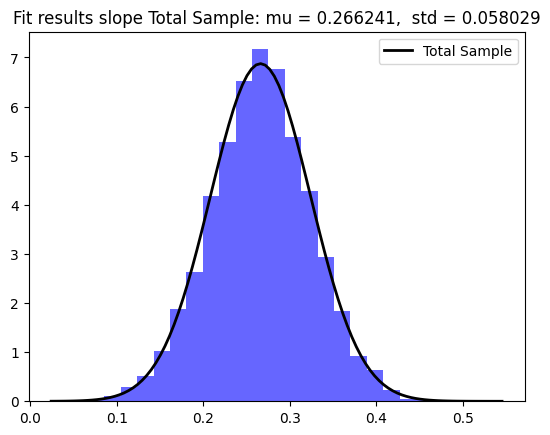

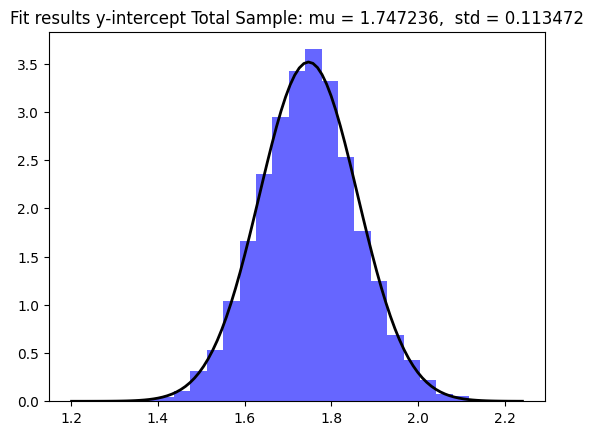

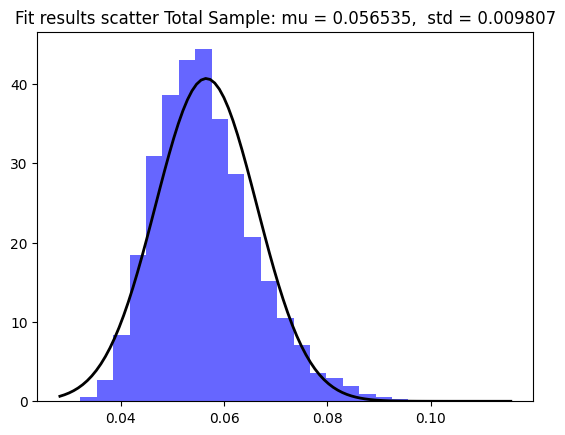

In [84]:
total_sample_data.slope_mu, total_sample_data.slope_std = norm.fit(total_sample_slope_flux_alpha)
# Plot the histogram.
plt.hist(total_sample_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.slope_mu, total_sample_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")
title = "Fit results slope Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.slope_mu, total_sample_data.slope_std)
plt.title(title)
plt.legend()
plt.show()

total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std = norm.fit(total_sample_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(total_sample_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.title(title)
plt.show()

total_sample_data.scatter_mu, total_sample_data.scatter_std = norm.fit(scatter_total_sample)
# Plot the histogram.
plt.hist(scatter_total_sample, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.scatter_mu, total_sample_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.scatter_mu, total_sample_data.scatter_std)
plt.title(title)
plt.show()

### Upper-Sco

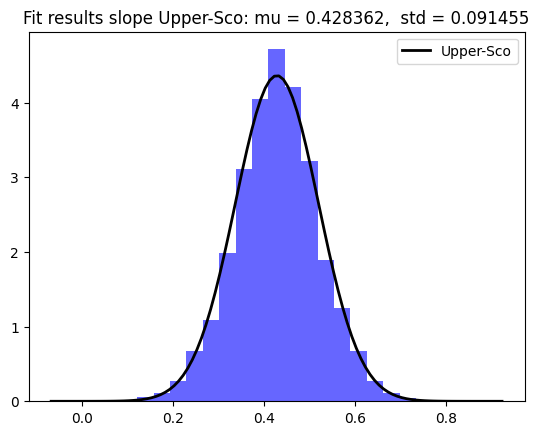

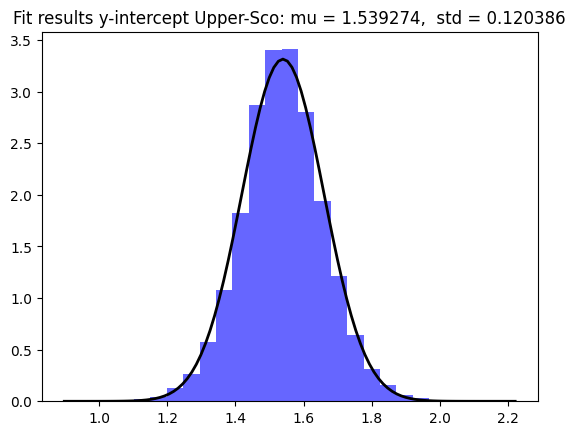

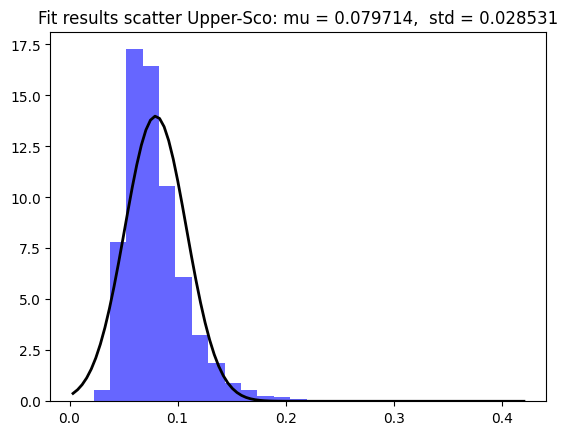

In [85]:
upper_sco_data.slope_mu, upper_sco_data.slope_std = norm.fit(upper_sco_slope_flux_alpha)
# Plot the histogram.
plt.hist(upper_sco_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco")
title = "Fit results slope Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.title(title)
plt.legend()
plt.show()

upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std = norm.fit(upper_sco_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(upper_sco_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.title(title)
plt.show()

upper_sco_data.scatter_mu, upper_sco_data.scatter_std = norm.fit(scatter_upper_sco)
# Plot the histogram.
plt.hist(scatter_upper_sco, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.scatter_mu, upper_sco_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.scatter_mu, upper_sco_data.scatter_std)
plt.title(title)
plt.show()

In [86]:
print(u"Lupus slope mean: %.5f \u00B1 %.5f "
      "\nOphiucus slope mean: %.5f \u00B1 %.5f"
      "\nTaurus slope mean: %.5f \u00B1 %.5f"
      "\nTotal Sample slope mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco slope mean: %.5f \u00B1 %.5f"
      % (lupus_data.slope_mu, lupus_data.slope_std,
         ophiucus_data.slope_mu,ophiucus_data.slope_std,
         taurus_data.slope_mu, taurus_data.slope_std,
         total_sample_data.slope_mu, total_sample_data.slope_std,
         upper_sco_data.slope_mu, upper_sco_data.slope_std))

Lupus slope mean: 0.45868 ± 0.12232 
Ophiucus slope mean: 0.35521 ± 0.39611
Taurus slope mean: 0.39703 ± 0.15270
Total Sample slope mean: 0.26624 ± 0.05803
Upper-Sco slope mean: 0.42836 ± 0.09145


In [87]:
print(u"Lupus y-intercept mean: %.5f \u00B1 %.5f"
      "\nOphiucus y-intercept mean: %.5f \u00B1 %.5f"
      "\nTaurus y-intercept mean: %.5f\u00B1 %.5f"
      "\nTotal Sample y-intercept mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco y-intercept mean: %.5f \u00B1 %.5f"
      % (lupus_data.y_intercept_mu, lupus_data.y_intercept_std,
         ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std,
         taurus_data.y_intercept_mu, taurus_data.y_intercept_std,
         total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std,
         upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std))

Lupus y-intercept mean: 1.47597 ± 0.20330
Ophiucus y-intercept mean: 1.44583 ± 0.88667
Taurus y-intercept mean: 1.48668± 0.32523
Total Sample y-intercept mean: 1.74724 ± 0.11347
Upper-Sco y-intercept mean: 1.53927 ± 0.12039


In [88]:
print(u"Lupus scatter mean: %.5f \u00B1 %.5f "
      "\nOphiucus scatter mean: %.5f \u00B1 %.5f"
      "\nTaurus scatter mean: %.5f \u00B1 %.5f"
      "\nTotal scatter slope mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco scatter mean: %.5f \u00B1 %.5f"
      % (lupus_scatter_mu, lupus_scatter_std,
         ophiucus_data.scatter_mu, ophiucus_data.scatter_std,
         taurus_data.scatter_mu, taurus_data.scatter_std,
         total_sample_data.scatter_mu, total_sample_data.scatter_std,
         upper_sco_data.scatter_mu, upper_sco_data.scatter_std))

Lupus scatter mean: 0.01706 ± 0.01380 
Ophiucus scatter mean: 0.06430 ± 0.05171
Taurus scatter mean: 0.01434 ± 0.01481
Total scatter slope mean: 0.05654 ± 0.00981
Upper-Sco scatter mean: 0.07971 ± 0.02853


In [89]:
from tabulate import tabulate
first_row = ["Region", "Slope mean", "Slope std", "Y-Intercept mean", "Y-Intercept std", "scatter mean", "scatter std"]
table = [["Upper-Sco", upper_sco_data.slope_mu, upper_sco_data.slope_std, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std, upper_sco_data.scatter_mu, upper_sco_data.scatter_std],
         ["Lupus", lupus_data.slope_mu, lupus_data.slope_std, lupus_data.y_intercept_mu, lupus_data.y_intercept_std, lupus_scatter_mu, lupus_scatter_std],
         ["Taurus", taurus_data.slope_mu, taurus_data.slope_std, taurus_data.y_intercept_mu, taurus_data.y_intercept_std, taurus_data.scatter_mu, taurus_data.scatter_std],
         ["Ophiucus", ophiucus_data.slope_mu, ophiucus_data.slope_std, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std, ophiucus_data.scatter_mu, ophiucus_data.scatter_std],
         ["Lupus + Taurus + Ophiucus", total_sample_data.slope_mu, total_sample_data.slope_std, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std, total_sample_data.scatter_mu, total_sample_data.scatter_std]]
print(tabulate(table, headers = first_row))

Region                       Slope mean    Slope std    Y-Intercept mean    Y-Intercept std    scatter mean    scatter std
-------------------------  ------------  -----------  ------------------  -----------------  --------------  -------------
Upper-Sco                      0.428362    0.0914548             1.53927           0.120386       0.0797137     0.0285305
Lupus                          0.458684    0.122321              1.47597           0.2033         0.0170555     0.0138047
Taurus                         0.397026    0.152702              1.48668           0.325229       0.0143445     0.0148138
Ophiucus                       0.35521     0.396107              1.44583           0.886669       0.0643041     0.0517081
Lupus + Taurus + Ophiucus      0.266241    0.0580293             1.74724           0.113472       0.0565354     0.00980708


/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_12569/1930988756.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color="g", label="Lupus")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_12569/1930988756.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_12569/1930988756.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Ophiucus", color="r")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/

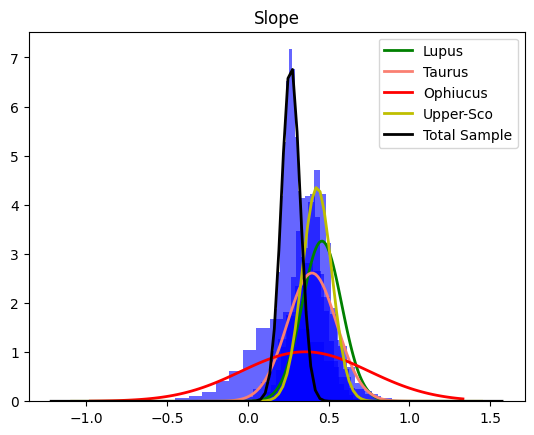

In [111]:
# Plot the histogram.
plt.hist(lupus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.slope_mu, lupus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, color="g", label="Lupus")


# Plot the histogram.
plt.hist(taurus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.slope_mu, taurus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")


# Plot the histogram.
plt.hist(ophiucus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Ophiucus", color="r")


# Plot the histogram.
plt.hist(upper_sco_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco", color="y")


# Plot the histogram.
plt.hist(total_sample_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.slope_mu, total_sample_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")


plt.title("Slope")
plt.legend()

/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_12569/2321213384.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Lupus", color="g")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_12569/2321213384.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_12569/2321213384.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color="r")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_12569/

Text(0.5, 1.0, 'Y-Intercept')

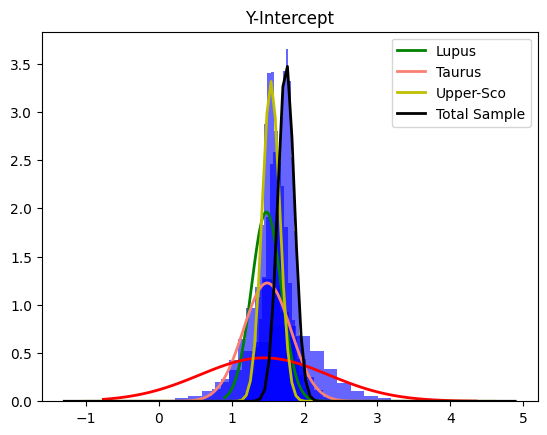

In [109]:
# Plot the histogram.
plt.hist(lupus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Lupus", color="g")


# Plot the histogram.
plt.hist(taurus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")


# Plot the histogram.
plt.hist(ophiucus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, color="r")


# Plot the histogram.
plt.hist(upper_sco_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco", color="y")


# Plot the histogram.
plt.hist(total_sample_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")

plt.legend()
plt.title("Y-Intercept")

In [92]:
#ks test
# assume scatter = 0, calculate spectral_index for upper-sco from function of total sample
# repeat by changing alpha, beta and scatter
# using montecarlo simulation random values for alpha, beta and scatter will be taken
# note that while alpha and beta will be constant for each rune, scatter will not
# I have to randomly assign a spread for the scatter for every run
# for every element calculated in every run, scatter will have to change and be withing the standard deviation

# the run ks 2 sample test on observed vs calculated and store the values

## Take random values from Gaussian

In [112]:
calculated_spectra_indices_upper_sco = []
calculated_spectra_indices_lupus = []

def spectral_index_function(alpha, beta, scatter, x):
    return alpha + beta * x - scatter

def loop_spectra_index(slope_mu, slope_std, y_intercept_mu, y_intercept_std, scatter_mu, scatter_std, flux):
    beta = random.gauss(slope_mu, slope_std)
    alpha = random.gauss(y_intercept_mu, y_intercept_std)
    subset = []
    for x in range(len(flux)):
        new_scatter_std = random.gauss(scatter_mu, scatter_std)
        scatter = random.gauss(scatter_mu, scatter_mu - new_scatter_std)
        subset.append(spectral_index_function(alpha, beta, scatter, flux[x]))

    return subset

for i in range(1000):
    calculated_spectra_indices_upper_sco.append(loop_spectra_index(upper_sco_data.slope_mu, upper_sco_data.slope_std,
                                                                   upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std,
    upper_sco_data.scatter_mu, upper_sco_data.scatter_std,
    log_flux_barenfeld_0_88mm_updated))

    calculated_spectra_indices_lupus.append(loop_spectra_index(lupus_data.slope_mu, lupus_data.slope_std, lupus_data.y_intercept_mu, lupus_data.y_intercept_std, lupus_scatter_mu, lupus_scatter_std, log_flux_lupus_1_mm))

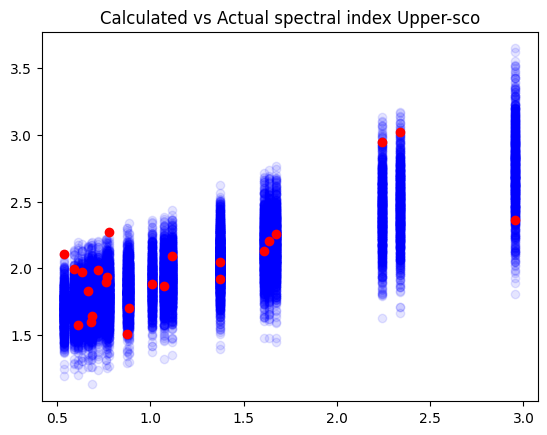

Mean ks test on calculated vs measure spectral index for uppper-sco from upper-sco mc simulation:  0.2658645516041118


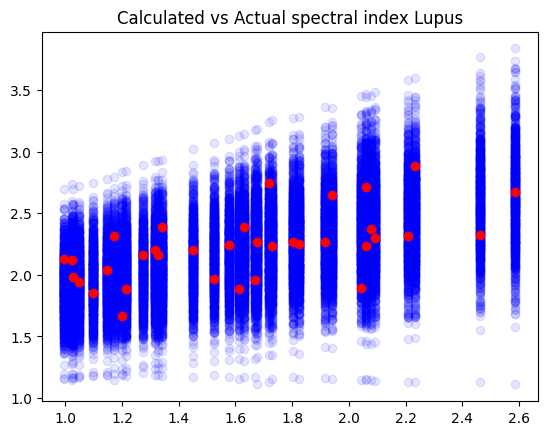

In [134]:
ks_2sample_upper_sco = []
for i in range(len(calculated_spectra_indices_upper_sco)):
    ks_2sample_upper_sco.append(ks_2samp(spectral_index_upper_sco, calculated_spectra_indices_upper_sco[i])[1])
    plt.scatter(log_flux_barenfeld_0_88mm_updated, calculated_spectra_indices_upper_sco[i], alpha=0.1, c="b")

plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, c='r')
plt.title("Calculated vs Actual spectral index Upper-sco")
plt.show()
print("Mean ks test on calculated vs measure spectral index for uppper-sco from upper-sco mc simulation: ", np.mean(ks_2sample_upper_sco))


for i in range(len(calculated_spectra_indices_lupus)):
    plt.scatter(log_flux_lupus_1_mm, calculated_spectra_indices_lupus[i], alpha=0.1, c="b")

plt.scatter(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, c='r')
plt.title("Calculated vs Actual spectral index Lupus")
plt.show()

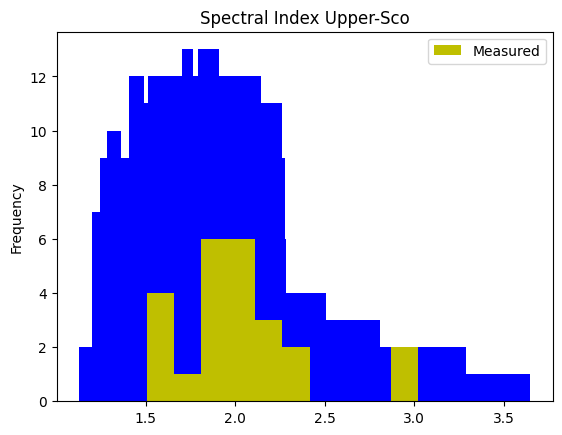

In [131]:
for i in range(len(calculated_spectra_indices_upper_sco)):
    mu_calculated, std_calculated = norm.fit(calculated_spectra_indices_upper_sco[i])

    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu_calculated, std_calculated)
    plt.hist(calculated_spectra_indices_upper_sco[i], color='b')

plt.hist(spectral_index_upper_sco, color='y', label='Measured')

plt.title("Spectral Index Upper-Sco")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Text(0, 0.5, '$\\alpha$')

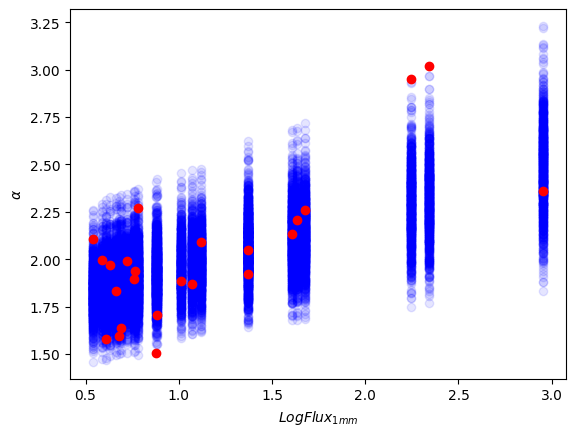

In [120]:
calculated_spectral_index_upper_sco_from_total_sample = []

for i in range(1000):
    calculated_spectral_index_upper_sco_from_total_sample.append(loop_spectra_index(total_sample_data.slope_mu, total_sample_data.slope_std, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std,
    total_sample_data.scatter_mu, total_sample_data.scatter_std, log_flux_barenfeld_0_88mm_updated))

for i in range(len(calculated_spectral_index_upper_sco_from_total_sample)):
    plt.scatter(log_flux_barenfeld_0_88mm_updated, calculated_spectral_index_upper_sco_from_total_sample[i], alpha=0.1, c="b")

plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, c='r')
plt.xlabel("$Log Flux_{1mm}$")
plt.ylabel(r"$\alpha$")

#### Mean of ks_2sample between real upper-sco spectral indices and calculated upper-sco spectral index values from the Monte-Carlo simulation for total sample

In [133]:
matching_upper_sco_real_vs_from_total_sample = []
for i in range(len(calculated_spectral_index_upper_sco_from_total_sample)):
    matching_upper_sco_real_vs_from_total_sample.append(ks_2samp(calculated_spectral_index_upper_sco_from_total_sample[i], spectral_index_upper_sco)[1])

print("Mean ks test on calculated vs measure spectral index for uppper-sco from total sample mc simulation: ", np.mean(matching_upper_sco_real_vs_from_total_sample))

Mean ks test on calculated vs measure spectral index for uppper-sco from total sample mc simulation:  0.19906801386101075


#### Mean of ks_2sample between real upper-sco spectral indices and calculated upper-sco spectral index values from the Monte-Carlo simulation for upper-sco sample

In [117]:
print(max(ks_2sample_upper_sco))

0.9024001944012529


(array([292.,   0., 117.,   0.,  91.,   0.,   0.,   0.,   0.,   0.,  82.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 129.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 176.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 113.]),
 array([7.61080552e-07, 1.37210884e-02, 2.74414156e-02, 4.11617429e-02,
        5.48820702e-02, 6.86023975e-02, 8.23227248e-02, 9.60430520e-02,
        1.09763379e-01, 1.23483707e-01, 1.37204034e-01, 1.50924361e-01,
        1.64644688e-01, 1.78365016e-01, 1.92085343e-01, 2.05805670e-01,
        2.19525998e-01, 2.33246325e-01, 2.46966652e-01, 2.60686979e-01,
        2.74407307e-01, 2.88127634e-01, 3.01847961e-01, 3.15568289e-01,
        3.29288616e-01, 3.43008943e-01, 3.56729270e-01, 3.70449598e-01,
        3.84169925e-01, 3.97890252e-01, 4.11610580e-01, 4.25330907e-01,
        4.39051234e-01, 4.52771561e-01, 4.66491889e-01, 4.80212216e-01,
        4.

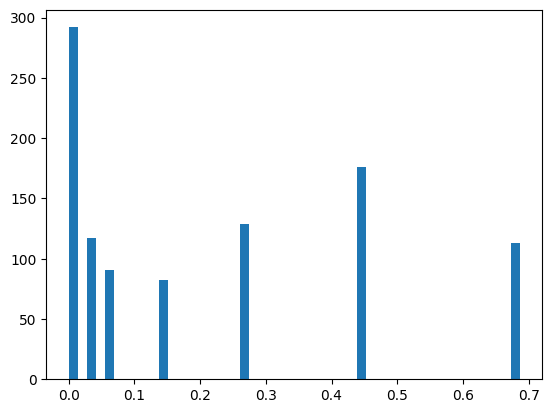

In [118]:
plt.hist(matching_upper_sco_real_vs_from_total_sample, bins=50)